In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('flight_data.csv')
df = df[['MONTH', 'DEP_DEL15', 'CARRIER_NAME', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']] 
df = df.dropna()

In [3]:
# One-hot encoder object
one_hot_encoder = OneHotEncoder()

one_hot_encoded = one_hot_encoder.fit_transform(df[['DEPARTING_AIRPORT']])
one_hot_encoded2 = one_hot_encoder.fit_transform(df[['CARRIER_NAME']])
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=['feature'+str(i) for i in range(one_hot_encoded.shape[1])])
one_hot_df2 = pd.DataFrame(one_hot_encoded2.toarray(), columns=['feature'+str(i) for i in range(one_hot_encoded2.shape[1])])

df = df.drop('DEPARTING_AIRPORT', axis=1)
df = df.drop('CARRIER_NAME', axis=1)
df = pd.concat([df, one_hot_df], axis=1)
df = pd.concat([df, one_hot_df2], axis=1)

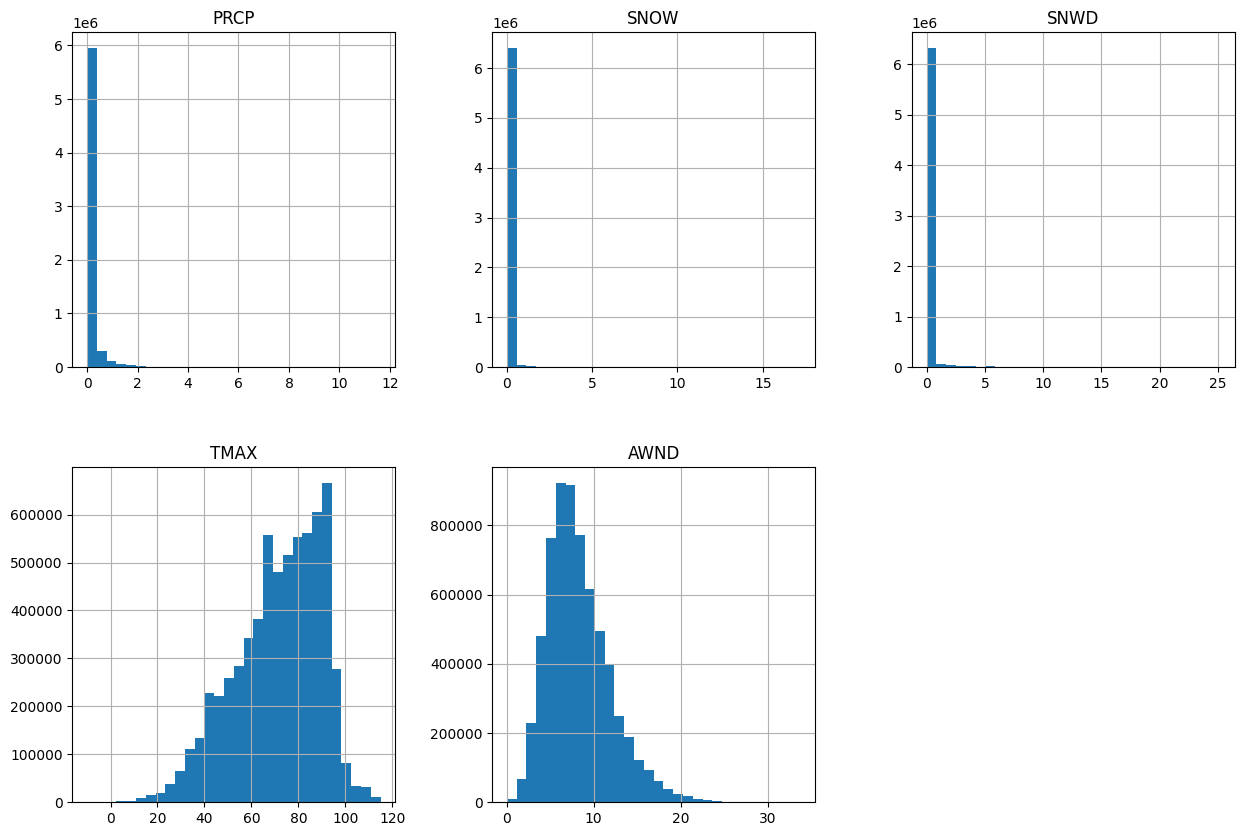

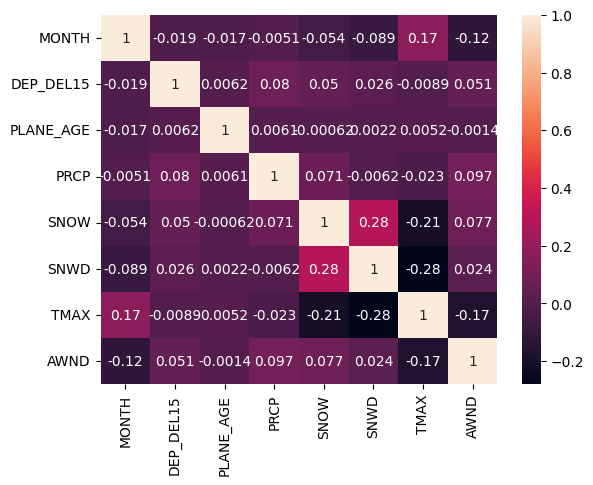

Root Mean Squared Error: 0.3876518213252121


/Users/kiran/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [4]:
# Distributions
df[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']].hist(bins=30, figsize=(15, 10), layout=(2, 3));

# Boxplots
sns.boxplot(data=df[['PRCP', 'SNOW', 'SNWD']])
plt.show()

# Check for collinearity among predictors 
collinearity_matrix = df[['MONTH','DEP_DEL15','PLANE_AGE','PRCP','SNOW','SNWD','TMAX','AWND']].corr()
sns.heatmap(collinearity_matrix, annot=True)
plt.show()

# Model to predict delay based on weather and departing airport 
X = df.loc[:, df.columns != 'DEP_DEL15']
y = df['DEP_DEL15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Root mean square error
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')
